### EDA

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [20]:
# load
data_path = "telechurn.csv"
df = pd.read_csv(data_path)

In [21]:
# Tampilkan 5 baris pertama
print("===== 5 BARIS PERTAMA =====")
display(df.head())

===== 5 BARIS PERTAMA =====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Ringkasan info()
print("\n\n===== INFO() =====")
print(df.info())



===== INFO() =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [23]:
# Statistik deskriptif (numerik)
print("\n\n===== DESCRIBE() =====")
display(df.describe(include='all').T)



===== DESCRIBE() =====


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Preprocessing ringan: convert TotalCharges ke numeric jika perlu
if df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [25]:
# Persentase missing value per kolom
missing_pct = df.isna().mean() * 100
missing_df = missing_pct.reset_index()
missing_df.columns = ['column', 'missing_pct']
missing_df = missing_df.sort_values('missing_pct', ascending=False)
print("\n\n===== PERSENTASE MISSING VALUE =====")
display(missing_df)



===== PERSENTASE MISSING VALUE =====


,column,missing_pct
19,TotalCharges,0.156183
0,customerID,0.000000
11,DeviceProtection,0.000000
18,MonthlyCharges,0.000000
17,PaymentMethod,0.000000
16,PaperlessBilling,0.000000
15,Contract,0.000000
14,StreamingMovies,0.000000
13,StreamingTV,0.000000
12,TechSupport,0.000000


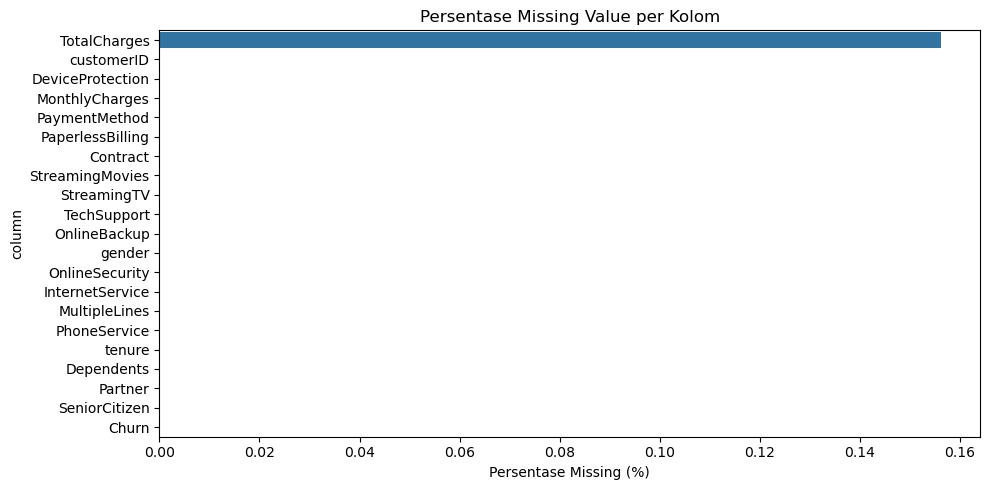

In [26]:
# Visualisasikan missing value sebagai bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=missing_df, x='missing_pct', y='column')
plt.xlabel("Persentase Missing (%)")
plt.title("Persentase Missing Value per Kolom")
plt.tight_layout()
plt.show()

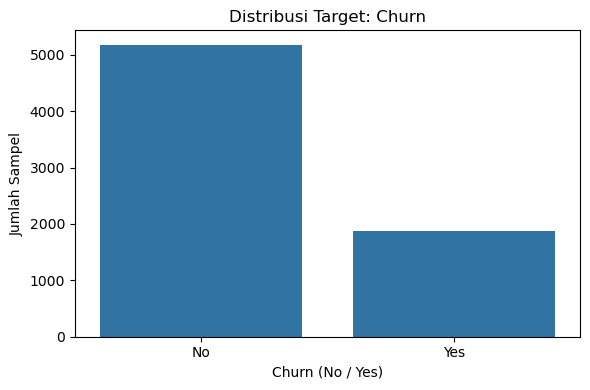


Proporsi kelas (persen):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [27]:
# Distribusi target (Churn)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Distribusi Target: Churn")
plt.xlabel("Churn (No / Yes)")
plt.ylabel("Jumlah Sampel")
plt.tight_layout()
plt.show()

print("\nProporsi kelas (persen):")
print(df['Churn'].value_counts(normalize=True) * 100)


Fitur numerik yang dianalisis: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


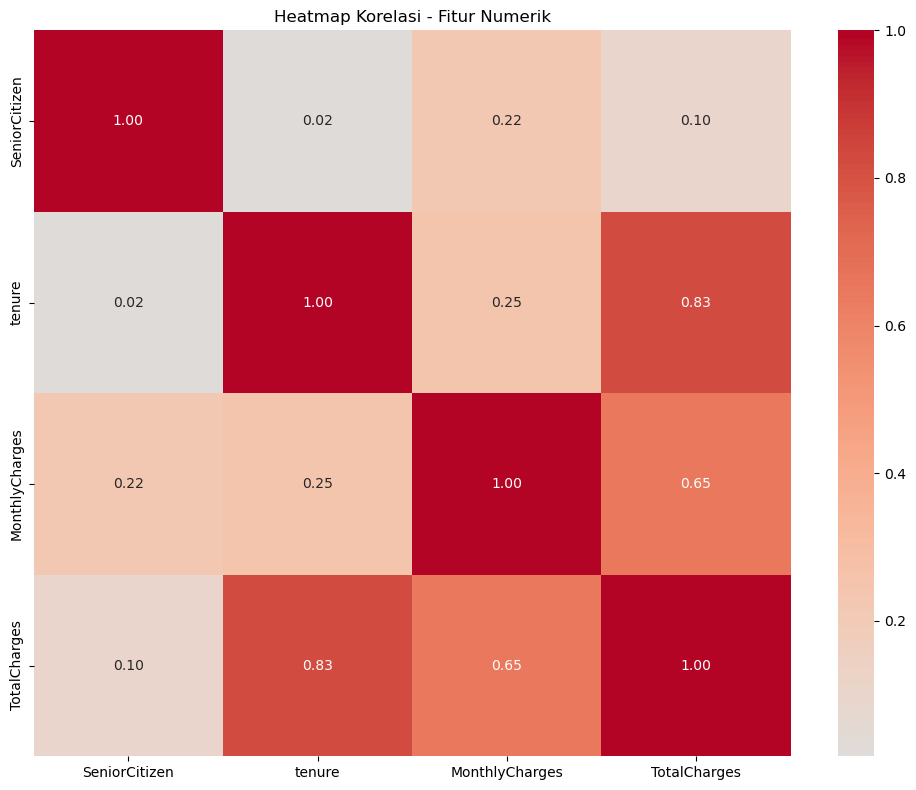


Pasangan fitur numerik dengan korelasi |r| >= 0.5:
tenure <-> TotalCharges : r = 0.83
MonthlyCharges <-> TotalCharges : r = 0.65


In [28]:
# Korelasi untuk fitur numerik
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nFitur numerik yang dianalisis:", num_cols)

plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi - Fitur Numerik")
plt.tight_layout()
plt.show()

# Tampilkan pasangan korelasi yang tinggi (> 0.5 atau < -0.5)
high_corr_pairs = []
threshold = 0.5
for i, a in enumerate(num_cols):
    for b in num_cols[i+1:]:
        val = corr.loc[a,b]
        if abs(val) >= threshold:
            high_corr_pairs.append((a,b,val))
print("\nPasangan fitur numerik dengan korelasi |r| >= 0.5:")
for a,b,v in high_corr_pairs:
    print(f"{a} <-> {b} : r = {v:.2f}")

### Direct Modeling

In [29]:
# load + quick convert TotalCharges
df = pd.read_csv(data_path)
if df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [30]:
# supaya tidak error
df = df.dropna()     

In [31]:
# siapkan X,y — gunakan semua kolom lain sebagai fitur
# Drop target & customerID to avoid ID leakage
X = df.drop(columns=['customerID','Churn'])
y = df['Churn'].map({'No':0,'Yes':1})  # encode target 0/1

In [32]:
# Important: untuk direct modeling kita tidak melakukan encoding
# sehingga kita must convert all object columns to something numeric or let models fail.
# Namun instruksi: "langsung tanpa preprocessing" -> kita will use pandas get_dummies
# but minimal: use get_dummies so models can run (this counts as minimal transformation)
# If you prefer STRICTLY no preprocessing, models like Logistic won't run on object dtype.
X = pd.get_dummies(X, drop_first=True)

In [33]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Define models
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier()

In [35]:
# Voting classifier (ensemble voting of LR, SVM, KNN) -- but we used KNN here; to follow spec include SVC:
from sklearn.svm import SVC
model_svc = SVC(probability=True)  # needed for soft voting if used
voting = VotingClassifier(estimators=[
    ('lr', model_lr),
    ('svc', model_svc),
    ('knn', model_knn)
], voting='hard')

models = {
    "LogisticRegression": model_lr,
    "RandomForest": model_rf,
    "VotingClassifier": voting
}

In [36]:
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)
    cm = confusion_matrix(y_te, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_te, y_pred, digits=4))
    print("\n")

In [37]:
# run evaluation
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

--- LogisticRegression ---
Accuracy : 0.8003
Precision: 0.6405
Recall   : 0.5668
F1-score : 0.6014
Confusion Matrix:
[[914 119]
 [162 212]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8494    0.8848    0.8668      1033
           1     0.6405    0.5668    0.6014       374

    accuracy                         0.8003      1407
   macro avg     0.7450    0.7258    0.7341      1407
weighted avg     0.7939    0.8003    0.7962      1407



--- RandomForest ---
Accuracy : 0.7896
Precision: 0.6258
Recall   : 0.5187
F1-score : 0.5673
Confusion Matrix:
[[917 116]
 [180 194]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8359    0.8877    0.8610      1033
           1     0.6258    0.5187    0.5673       374

    accuracy                         0.7896      1407
   macro avg     0.7309    0.7032    0.7141      1407
weighted avg     0.7801    0.7896    0.7829      1407



--- VotingClassifier

### Modeling Dengan Preprocessing

In [41]:
df = pd.read_csv(data_path)
if df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [42]:
# penanganan duplikasi
df = df.drop_duplicates()

In [43]:
# drop atau simpan customerID
df = df.drop(columns=['customerID'])

In [44]:
# handle missing simple: for TotalCharges NaN could be for tenure=0 -> inspect
print("Missing sebelum:", df.isna().sum())

Missing sebelum: gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [45]:
# define X,y
y = df['Churn'].map({'No':0,'Yes':1})
X = df.drop(columns=['Churn'])

In [46]:
# identify column types
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Numerical cols:", num_cols)
print("Categorical cols:", cat_cols)

Numerical cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [48]:
# Build preprocessing pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output =False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
], remainder='drop')


In [49]:
# train-test split (same proportion as direct modeling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# define model pipelines
pipe_lr = Pipeline([('preproc', preprocessor), ('clf', LogisticRegression(max_iter=2000))])
pipe_rf = Pipeline([('preproc', preprocessor), ('clf', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('preproc', preprocessor), ('clf', KNeighborsClassifier())])

In [51]:
# Voting ensemble (again use LR, SVC, KNN inside voting)
pipe_svc = Pipeline([('preproc', preprocessor), ('clf', SVC(probability=True))])
voting = VotingClassifier(estimators=[
    ('lr', pipe_lr),
    ('svc', pipe_svc),
    ('knn', pipe_knn)
], voting='hard')

In [52]:
models = {
    "LogisticRegression_preproc": pipe_lr,
    "RandomForest_preproc": pipe_rf,
    "Voting_preproc": voting
}

In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
    print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print("\n")

--- LogisticRegression_preproc ---
Accuracy : 0.8055358410220014
Precision: 0.6572327044025157
Recall   : 0.5588235294117647
F1-score : 0.6040462427745664
Confusion Matrix:
 [[926 109]
 [165 209]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8488    0.8947    0.8711      1035
           1     0.6572    0.5588    0.6040       374

    accuracy                         0.8055      1409
   macro avg     0.7530    0.7268    0.7376      1409
weighted avg     0.7979    0.8055    0.8002      1409



--- RandomForest_preproc ---
Accuracy : 0.7778566359119943
Precision: 0.6033898305084746
Recall   : 0.47593582887700536
F1-score : 0.5321375186846039
Confusion Matrix:
 [[918 117]
 [196 178]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8241    0.8870    0.8544      1035
           1     0.6034    0.4759    0.5321       374

    accuracy                         0.7779      1409
   macro avg    